In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import networkx as nx
import tensorflow as tf
import numpy as np
from utils.utils import predict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_m_to_s = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_m_to_s", compile=True)
model_s_to_m = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_s_to_m", compile=True)

In [3]:
species_features_dummy = pd.read_csv("./data/species_features.csv.gz", index_col=0)
molecule_features_dummy = pd.read_csv("./data/molecule_features.csv.gz", index_col=0)
df_agg = pd.read_csv("./data/lotus_agg_test.csv.gz", index_col=0)

In [4]:
rdkit = pd.read_csv("./data/mol_dummy_rdkit.csv.gz", index_col=0).astype('uint8')
rdkit.columns = rdkit.columns.astype(str)

In [5]:
g_train = nx.read_graphml("./graph/train_graph.gml")
g = nx.read_graphml("./graph/test_graph.gml")
g  = nx.create_empty_copy(g)
g_merged = nx.compose(g_train, g)

In [6]:
df_agg_train = pd.read_csv("./data/lotus_agg_train.csv.gz", index_col=0)

In [7]:
g_test = nx.read_graphml("./graph/test_graph.gml")
g_lotus = nx.compose(g_train, g_test)

In [8]:
sku = pd.concat([df_agg, df_agg_train])

In [9]:
mol = 'O'
data_3 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [10]:
data_3

,molecule,species
0,O,Sphallerocarpus gracilis
1,O,Monanchora unguiculata
2,O,Plagiochila ericicola
3,O,Erepsia inclaudens
4,O,Kuehneromyces
...,...,...
36436,O,Drosera intermedia
36437,O,Centipeda minima
36438,O,Prorocentrum hoffmannianum
36439,O,Athamanta macedonica


In [11]:
out_3 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_3,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 5s 146ms/step
Predict both : running species to molecules prediction...
36/

[Text(0.5, 0, 'Probabilities'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Probability of water across all species.')]

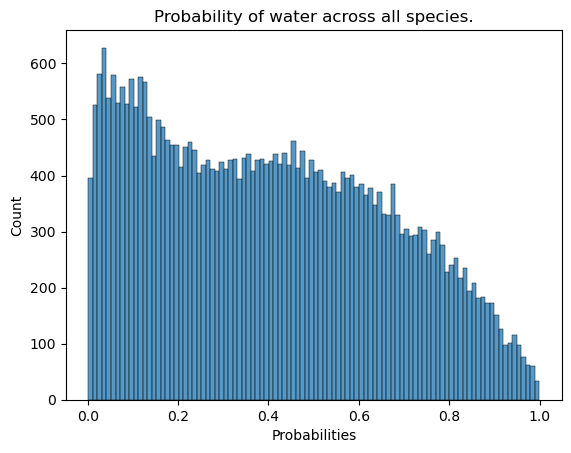

In [12]:
ax_3 = sns.histplot(data=out_3, x=out_3.prob, bins=100)
ax_3.set(xlabel="Probabilities",
        ylabel="Count",
        title="Probability of water across all species.")

In [13]:
out_3[out_3.prob>0.95]

,molecule,species,model,prob
109,O,Acacia auriculiformis,both_known,0.959974
202,O,Andrachne telephioides,both_known,0.984268
459,O,Schleichera oleosa,both_known,0.962307
542,O,Picea rubens,both_known,0.951880
558,O,Agaricus bisporus,both_known,0.976889
...,...,...,...,...
35820,O,Scorodophloeus zenkeri,both_known,0.965476
35955,O,Gigartina stellata,both_known,0.963460
36058,O,Nothomyrmecia macrops,both_known,0.982276
36338,O,Heracleum antasiaticum,both_known,0.969479


# Test 4: let's see if cholesterol is present "everywhere"


In [14]:
mol = 'COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O)OC3'
data_4 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [15]:
out_4 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_4,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 5s 131ms/step
Predict both : running species to molecules prediction...
36/

[Text(0.5, 0, 'Probabilities'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Probability of cholesterol across all species.')]

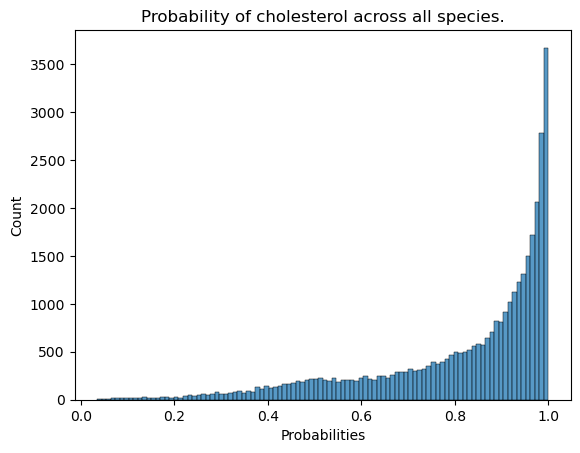

In [16]:
ax_4 = sns.histplot(data=out_4, x=out_4.prob, bins=100)
ax_4.set(xlabel="Probabilities",
        ylabel="Count",
        title="Probability of cholesterol across all species.")

In [17]:
out_4[out_4.prob>0.99]

,molecule,species,model,prob
24,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Acalypha marginata,both_known,0.990181
26,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Dianthus chinensis,both_known,0.992671
59,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Abies veitchii,both_known,0.998003
63,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Ozothamnus ledifolius,both_known,0.992683
76,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Thapsia tenuifolia,both_known,0.990674
...,...,...,...,...
35902,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Planochloris,both_known,0.997892
35910,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Artemisia capillaris,both_known,0.996888
35914,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Chloranthus spicatus,both_known,0.995479
35916,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Callicarpa longissima,both_known,0.990889


# Test 5: test with a more rare molecule : Erythromycin

In [18]:
mol = 'CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O'
data_5 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))}
)

In [19]:
out_5 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_5,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 9s 243ms/step
Predict both : running species to molecules prediction...
36/

[Text(0.5, 0, 'Probabilities'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Probability of erythromycin across all species.')]

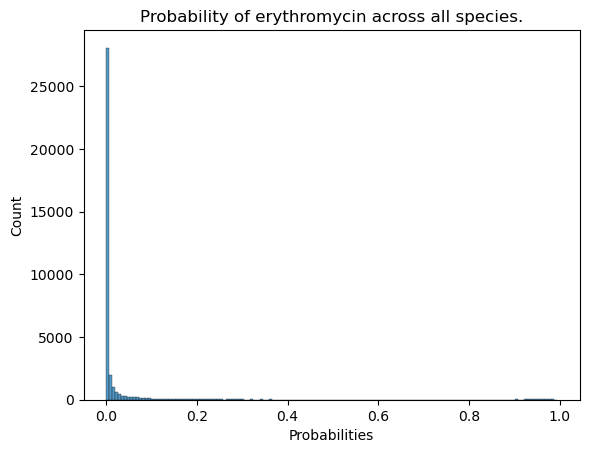

In [20]:
ax_5 = sns.histplot(data=out_5, x=out_5.prob, bins=150,)
ax_5.set(xlabel="Probabilities",
        ylabel="Count",
        title="Probability of erythromycin across all species.")

In [21]:
out_5[out_5.prob>0.95]

,molecule,species,model,prob
313,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces platensis,both_known,0.984159
361,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Micromonospora echinospora,both_known,0.981240
703,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces melanosporofaciens,both_known,0.973144
711,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Nocardia transvalensis,both_known,0.966032
1861,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces baarnensis,both_known,0.954072
...,...,...,...,...
35778,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Saccharopolyspora,both_known,0.985229
36090,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces pratensis,both_known,0.951879
36204,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces wadayamensis,both_known,0.962684
36326,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces arenae,both_known,0.978843


In [42]:
out_5_latex = out_5[out_5.prob>0.989].copy()
out_5_latex['molecule'] = "Erythromycin"
out_5_latex.drop(columns='model', inplace=True)
out_5_latex.rename(columns={
    "molecule": "Molecule",
    "species": "Species",
    "prob": "Probability"
}, inplace=True)

In [43]:
out_5_latex = out_5_latex.iloc[:, 1:]
out_5_latex = out_5_latex.sort_values(by='Probability', ascending=False)
out_5_latex = out_5_latex.iloc[:10, :]

In [45]:
print(out_5_latex.to_latex(
    index=False,
    float_format="{:.4f}".format,
)
)

\begin{tabular}{lr}
\toprule
Species & Probability \\
\midrule
Streptomyces diastaticus & 0.9944 \\
Streptomyces drozdowiczii & 0.9939 \\
Streptomyces antibioticus & 0.9928 \\
Micromonospora & 0.9927 \\
Streptomyces achromogenes & 0.9924 \\
Streptomyces griseus & 0.9919 \\
Streptomyces griseosporeus & 0.9912 \\
Streptomyces albogriseolus & 0.9906 \\
Streptomyces varsoviensis & 0.9899 \\
Streptomyces ansochromogenes & 0.9898 \\
\bottomrule
\end{tabular}



# Test adding just one edge to an unkown molecule to see the difference

In [24]:
mol = 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'
data_6 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [25]:
g_lotus.add_node('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='molecule')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Mus musculus', label='present_in')
g_lotus.add_edge('Mus musculus','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Dicranum japonicum', label='present_in')
g_lotus.add_edge( 'Dicranum japonicum', 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Streptomyces atratus', label='present_in')
g_lotus.add_edge('Streptomyces atratus','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C','Campylopus richardii', label='present_in')
g_lotus.add_edge('Campylopus richardii','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C','Suaeda aegyptiaca', label='present_in')
g_lotus.add_edge('Suaeda aegyptiaca','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')

In [26]:
from utils.molecules import smiles_to_classyfire, smiles_to_fingerprint

In [27]:
chol_classy = smiles_to_classyfire(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])

In [28]:
chol_fp = smiles_to_fingerprint(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])
chol_fp.columns  = chol_fp.columns.astype(str)

In [29]:
out_6 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_6,
                pd.concat([molecule_features_dummy, chol_classy]),
                pd.concat([rdkit, chol_fp]),
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184195, Edges: 869494

 Node types:
  molecule: [147748]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434747]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434747]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 5s 128ms/step
Predict both : running species to molecules prediction...
36/

(array([  7.,  13.,  33.,  31.,  34.,  21.,  24.,  19.,  26.,  23.,  22.,
         27.,  21.,  24.,  19.,  21.,  30.,  36.,  38.,  45.,  46.,  46.,
         49.,  39.,  60.,  54.,  50.,  51.,  54.,  61.,  65.,  63.,  75.,
         90.,  78.,  66.,  68.,  73.,  77.,  77.,  59., 105.,  80.,  80.,
         92.,  84.,  94.,  94.,  94.,  96.,  93.,  95.,  81.,  97.,  93.,
         98., 115., 111., 105., 104., 138., 114., 115., 115.,  97., 116.,
        105.,  94., 123., 113., 121., 126., 128., 128., 140., 142., 134.,
        140., 117., 130., 127., 139., 115., 137., 142., 130., 145., 132.,
        119., 128., 145., 148., 142., 135., 149., 140., 135., 143., 149.,
        157., 150., 146., 156., 160., 139., 153., 155., 163., 153., 157.,
        161., 156., 186., 162., 170., 187., 192., 188., 201., 197., 158.,
        193., 203., 183., 208., 213., 192., 197., 212., 208., 184., 225.,
        203., 233., 239., 229., 233., 255., 226., 295., 251., 216., 257.,
        266., 281., 303., 287., 272., 

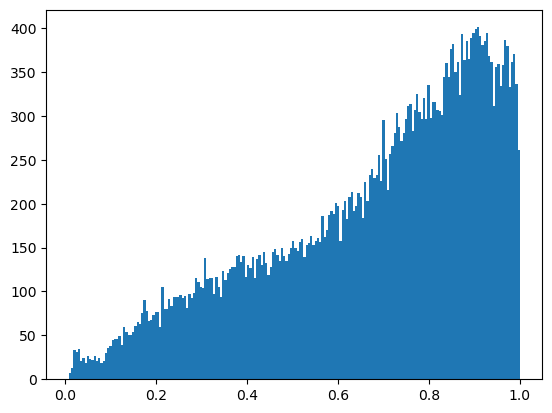

In [30]:
plt.hist(out_6.prob, bins=200)

In [31]:
out_6[out_6.prob>0.99]

,molecule,species,model,prob
87,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Dioscorea convolvulacea,both_known,0.996300
160,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Oleandra wallichii,both_known,0.990790
211,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Pinus radiata,both_known,0.996408
307,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Chattonella marina,both_known,0.998490
352,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Cystoseira elegans,both_known,0.998257
...,...,...,...,...
36255,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Trachyrhamphus serratus,both_known,0.992835
36287,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Physarum flavicomum,both_known,0.997349
36373,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Metasequoia glyptostroboides,both_known,0.994170
36383,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Holotrichia diomphalia,both_known,0.997516
